# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [56]:
cities

['carutapera',
 "barka'",
 "kapa'a",
 'papao',
 'chonchi',
 'nantucket',
 'punta arenas',
 'ushuaia',
 'campo mourao',
 'grytviken',
 'general pico',
 'toga village',
 'taiohae',
 'edinburgh of the seven seas',
 'keflavik',
 'fort bragg',
 'port-aux-francais',
 'waitangi',
 'kiomboi',
 'turtas',
 'codrington',
 'dalnegorsk',
 'ancud',
 'saint-joseph',
 'walvis bay',
 'ilulissat',
 'clarence town',
 'longyearbyen',
 'machico',
 'mojoagung',
 'bredasdorp',
 "nar'yan-mar",
 'jamestown',
 'west island',
 'invercargill',
 'twin falls',
 'petropavlovsk-kamchatsky',
 'yarmouth',
 'maamba',
 'iskateley',
 'adamstown',
 'jurbarkas',
 "st. john's",
 'pacific grove',
 'conde',
 'isafjordur',
 'albany',
 'fort st. john',
 "hayma'",
 'kodiak',
 'labuan',
 'cidreira',
 'taulaga',
 'vilyuchinsk',
 'lebu',
 'fale old settlement',
 'atafu village',
 'yellowknife',
 'port-vila',
 'puerto ayora',
 "ivdel'",
 'puerto carreno',
 'afaahiti',
 'puerto natales',
 'jwaneng',
 'saint-paul',
 'zuidhorn',
 'yukhn

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carutapera
Processing Record 2 of Set 1 | barka'
City not found. Skipping...
Processing Record 3 of Set 1 | kapa'a
Processing Record 4 of Set 1 | papao
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | nantucket
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | campo mourao
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | general pico
Processing Record 12 of Set 1 | toga village
City not found. Skipping...
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | fort bragg
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | kiomboi
Processing Record 20 of Set 1 | turtas
Processi

In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [59]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carutapera,-1.1950,-46.0200,26.07,80,11,3.93,BR,1723170346
1,kapa'a,22.0752,-159.3190,29.18,66,0,5.66,US,1723170929
2,papao,-17.7500,-149.5500,24.08,90,72,6.16,PF,1723170930
3,chonchi,-42.6128,-73.8092,6.41,95,100,1.43,CL,1723170657
4,nantucket,41.2835,-70.0995,17.06,100,100,4.63,US,1723170932


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [61]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carutapera,-1.1950,-46.0200,26.07,80,11,3.93,BR,1723170346
1,kapa'a,22.0752,-159.3190,29.18,66,0,5.66,US,1723170929
2,papao,-17.7500,-149.5500,24.08,90,72,6.16,PF,1723170930
3,chonchi,-42.6128,-73.8092,6.41,95,100,1.43,CL,1723170657
4,nantucket,41.2835,-70.0995,17.06,100,100,4.63,US,1723170932


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

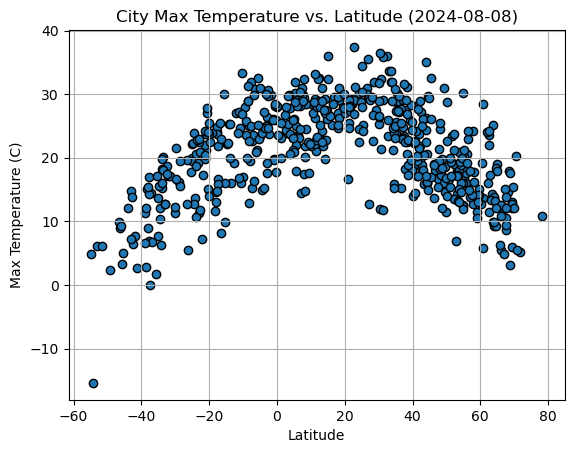

In [62]:
# Build scatter plot for latitude vs. temperature
max_temp = city_data_df["Max Temp"]
lat = city_data_df["Lat"]
plt.scatter(lat, max_temp, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude (2024-08-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

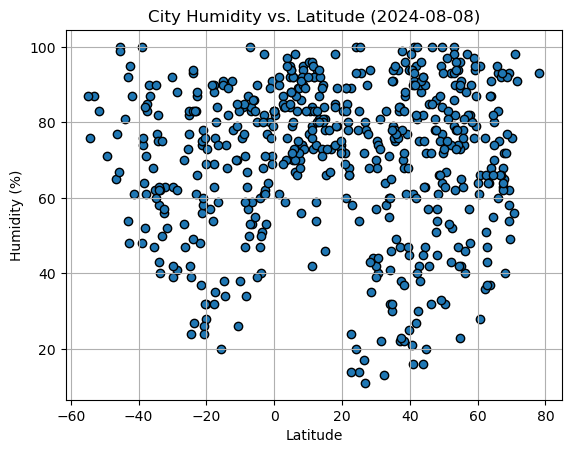

In [63]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(lat, humidity, marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs. Latitude (2024-08-08)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

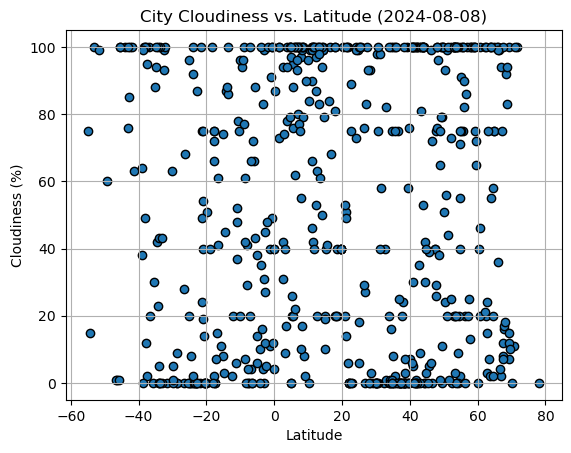

In [64]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lat, cloudiness, marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Cloudiness vs. Latitude (2024-08-08)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

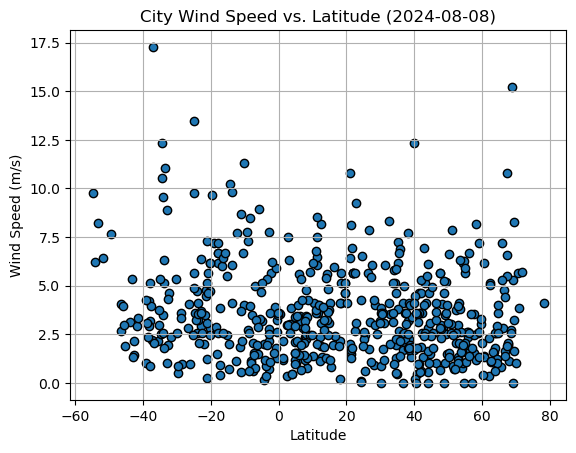

In [65]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lat, wind_speed, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Wind Speed vs. Latitude (2024-08-08)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def createLinearRegression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r^2-value is: {rvalue**2} ")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.annotate(line_eq,(xmin+1,ymin+1), xycoords='data', fontsize=15,color="red")
    
    

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapa'a,22.0752,-159.3190,29.18,66,0,5.66,US,1723170929
4,nantucket,41.2835,-70.0995,17.06,100,100,4.63,US,1723170932
11,keflavik,64.0049,-22.5624,9.24,87,100,2.57,IS,1723170455
12,fort bragg,35.1390,-79.0060,23.85,91,100,6.17,US,1723170457
16,turtas,58.9417,69.1325,11.43,76,100,2.58,RU,1723170734


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carutapera,-1.1950,-46.0200,26.07,80,11,3.93,BR,1723170346
2,papao,-17.7500,-149.5500,24.08,90,72,6.16,PF,1723170930
3,chonchi,-42.6128,-73.8092,6.41,95,100,1.43,CL,1723170657
5,punta arenas,-53.1500,-70.9167,6.06,87,100,8.23,CL,1723170779
6,ushuaia,-54.8000,-68.3000,4.81,87,75,9.77,AR,1723170929


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4216676446017158 


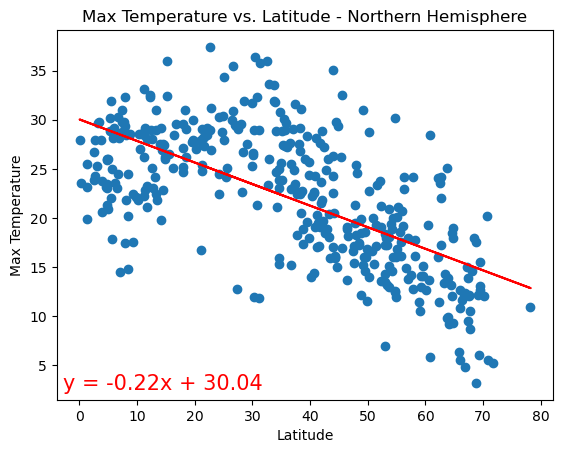

In [69]:
# Linear regression on Northern Hemisphere
createLinearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Max Temperature vs. Latitude - Northern Hemisphere")
plt.show()

The r^2-value is: 0.5506905686124243 


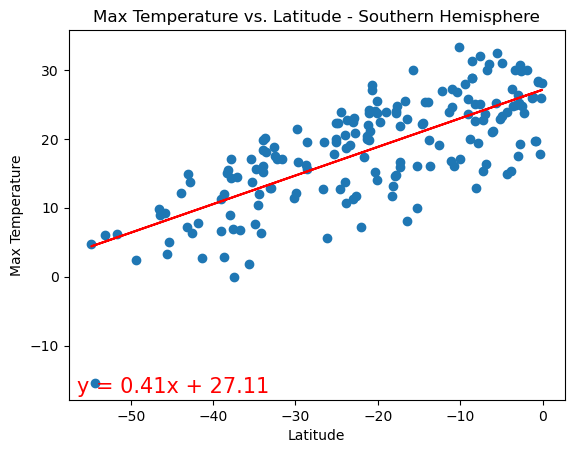

In [70]:
# Linear regression on Southern Hemisphere
createLinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Max Temperature vs. Latitude - Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

In the linear regression for the Northern Hemisphere, we see a negative correlation between max temperature and latitude where the max temperature decreases as latitude increases.  In contrast, the linear regression for the Southern Hemisphere shows the opposite - max temperature increases as latitude increases, indicating a positive correlation between the two variables.  In context, the correlations of the two plots makes sense since areas along the equator (where latitude = 0) are where temperatures tend to be the highest.  We can therefore expect the max temperatures to be higher at points closest to or at 0 latitude and lower for points further away from 0 (positive or negative in latitude value).

Looking at the r^2 values for both regressions, we see that the Northern Hemisphere plot has a lower r^2 value than the Southern Hemisphere plot, suggesting latiitude explains the observed max temperatures better in the Southern Hemisphere than in the Northern Hemisphere.  Given that the Northern Hemisphere has more countries/more land and is more populated, it could be inferred that more factors are influencing max temperatures in the Northern Hemisphere than in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.02033265648586912 


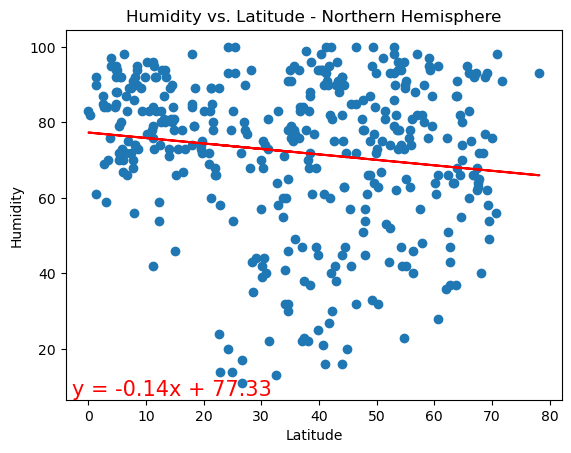

In [71]:
# Northern Hemisphere
createLinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude - Northern Hemisphere")
plt.show()

The r^2-value is: 0.002512561856195406 


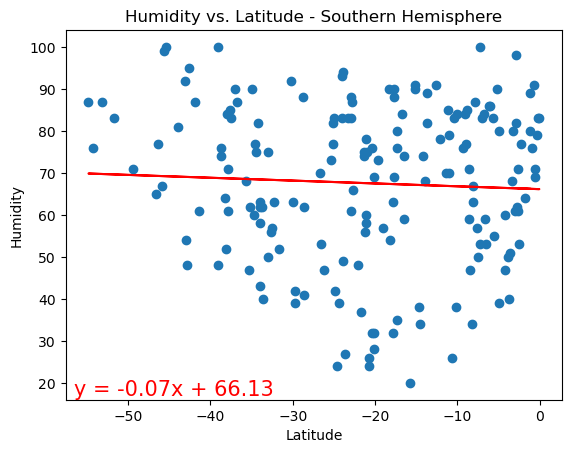

In [72]:
# Southern Hemisphere
createLinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude - Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

The linear regressions for both hemispheres show a negative correlation between latitude and humidity with the Northern Hemisphere showing a slightly steeper slope, indicating a greater decrease in humidity as latitude increases.  While the r^2 value is higher in the regression for the Northern Hemisphere, the r^2 values for both plots are quite low so a linear relationship is not the strongest explanation between the two variables in either case.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.015406038945796915 


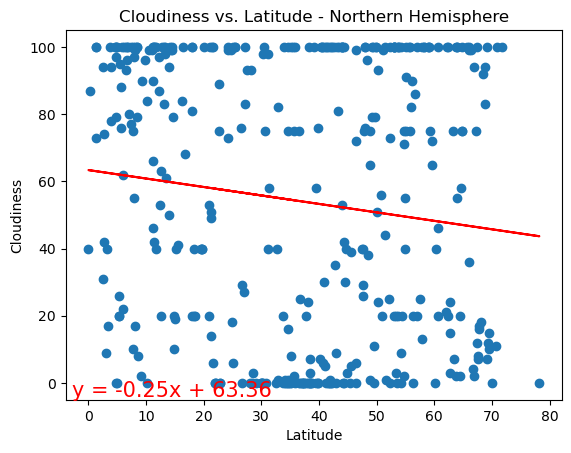

In [73]:
# Northern Hemisphere
createLinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude - Northern Hemisphere")
plt.show()

The r^2-value is: 0.01807106128693506 


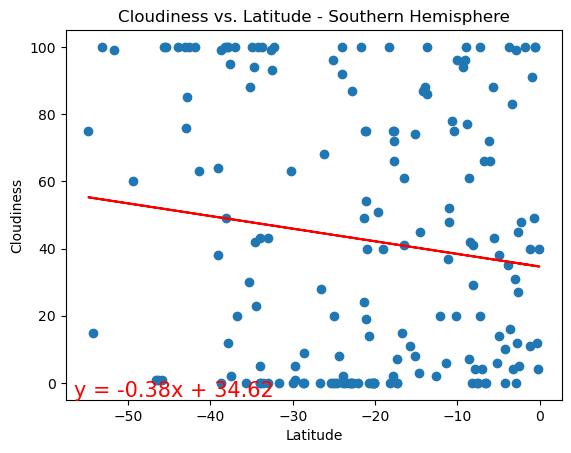

In [74]:
# Southern Hemisphere
createLinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude - Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Similiar to the regressions for Humidity vs. Latitude, the linear regressions of Cloudiness vs. Latitude for both hemispheres show a negative correlation, with the Southern Hemisphere showing a slightly steeper slope.  Both r^2 values appear comparable between both hemispheres but are again quite low, suggesting that a linear relationship is not the strongest explanation between the two variables.  This can visually be seen in both plots, where the datapoints appear in a non-linear pattern that splits off into two separate parallel and horizontal clusters.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.000779537923920415 


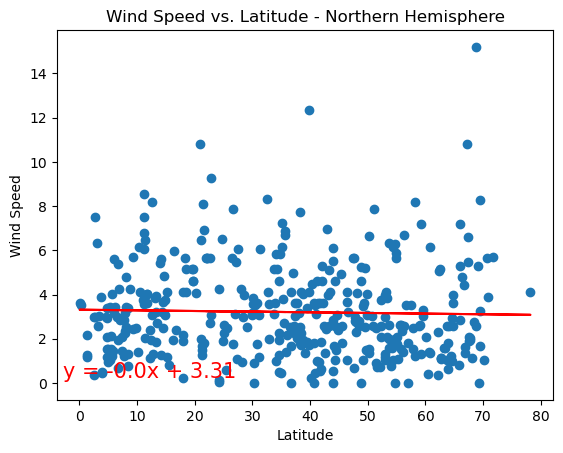

In [75]:
# Northern Hemisphere
createLinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude - Northern Hemisphere")
plt.show()

The r^2-value is: 0.023889364998329884 


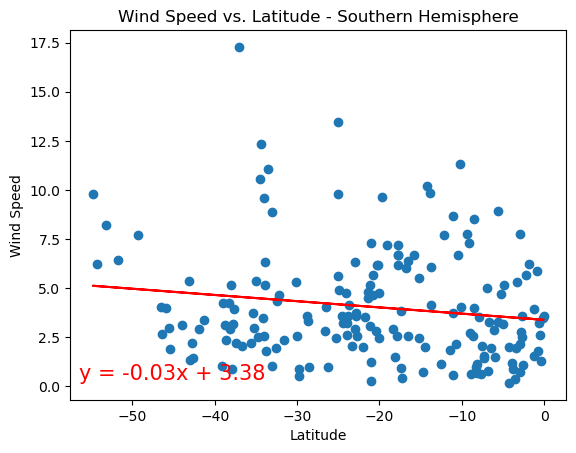

In [76]:
# Southern Hemisphere
createLinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude - Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

In the linear regression for the Northern Hemisphere, we see a relatively flat/slight negative correlation between wind speed and latitude.  In contrast, the linear regression for the Southern Hemisphere shows a slighly stronger negative correlation as well as a relatively stronger r^2 value.  In context, these results could be explained by the greater amount of land mass in the Northern Hemisphere.  Since the Northern Hemisphere has more land mass, there are potentially more physical barriers to the flow of wind which would therefore blunt the windspeed and keep it relatively stable despite the difference in latitude.  The Southern Hemisphere, on the other hand, has a greater amount of open sea meaning there are fewer physical barriers to the flow of wind, allowing for greater variability in observed wind speeds.